![rmotr](https://user-images.githubusercontent.com/7065401/52071918-bda15380-2562-11e9-828c-7f95297e4a82.png)
<hr style="margin-bottom: 40px;">

<img src="https://user-images.githubusercontent.com/7065401/69450217-6cee2780-0d3b-11ea-947b-461ea407da85.jpg"
    style="width:400px; float: right; margin: 0 40px 40px 40px;"></img>

### Project

# New York City Airbnb Open Data

Let's put in practice the topics covered in the course and analyze Airbnb listings data.

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Hands on! 

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Read the `airbnb_data` dataset into a `airbnb_df` DataFrame variable.

This data file includes all needed information to find out more about hosts and geographical availability.

This public dataset is part of Airbnb, and the original source can be found on this [website](http://insideairbnb.com/).

Here's a preview of that file:

In [24]:
!head data/airbnb_data.csv

'head' is not recognized as an internal or external command,
operable program or batch file.


The column names are taken from the original documentation for this dataset.

In [25]:
# your code goes here
airbnb_df = pd.read_csv('data/airbnb_data.csv')
airbnb_df.head()


,listing_id,listing_name,host_id,host_name,neighbourhood_group,lat_lon,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,"Kensington, Brooklyn",40.64749;-73.97237,Private room,"$149,00.-",1,9,19/10/18,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,"Midtown, Manhattan",40.75362;-73.98377,Entire home/apt,"$225,00.-",1,45,21/5/19,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,"Harlem, Manhattan",40.80902;-73.9419,Private room,"$150,00.-",3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,"Clinton Hill, Brooklyn",40.68514;-73.95976,Entire home/apt,"$89,00.-",1,270,5/7/19,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,"East Harlem, Manhattan",40.79851;-73.94399,Entire home/apt,"$80,00.-",10,9,19/11/18,0.10,1,0


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Setting `airbnb_data` index.

Set the index of the DataFrame to the `listing_id` column.

In [26]:
# your code goes here

airbnb_df.set_index('listing_id', inplace = True)
airbnb_df.head()


,listing_name,host_id,host_name,neighbourhood_group,lat_lon,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
listing_id,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,"Kensington, Brooklyn",40.64749;-73.97237,Private room,"$149,00.-",1,9,19/10/18,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,"Midtown, Manhattan",40.75362;-73.98377,Entire home/apt,"$225,00.-",1,45,21/5/19,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,"Harlem, Manhattan",40.80902;-73.9419,Private room,"$150,00.-",3,0,NaN,NaN,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,"Clinton Hill, Brooklyn",40.68514;-73.95976,Entire home/apt,"$89,00.-",1,270,5/7/19,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,"East Harlem, Manhattan",40.79851;-73.94399,Entire home/apt,"$80,00.-",10,9,19/11/18,0.10,1,0


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Checking missing data

We need to check if our `airbnb_data` has any null value. 

To do that, let's create a `percent_missing` Series containing the column names and the percent of missing values per column.

In [27]:
# your code goes here
percent_missing = airbnb_df.isna().mean() * 100
percent_missing




listing_name                      0.000000
host_id                           0.000000
host_name                         0.094340
neighbourhood_group               0.000000
lat_lon                           0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       4.056604
reviews_per_month                 4.056604
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Dealing with `reviews_per_month` missing values

Impute null values in the `reviews_per_month` column with a `0` value.

In [28]:
# your code goes here
airbnb_df['reviews_per_month'].info()


<class 'pandas.core.series.Series'>
Index: 1060 entries, 2539 to 442649
Series name: reviews_per_month
Non-Null Count  Dtype  
--------------  -----  
1017 non-null   float64
dtypes: float64(1)
memory usage: 16.6 KB


In [29]:
airbnb_df['reviews_per_month'].fillna(0, inplace= True)
airbnb_df['reviews_per_month'].info()

<class 'pandas.core.series.Series'>
Index: 1060 entries, 2539 to 442649
Series name: reviews_per_month
Non-Null Count  Dtype  
--------------  -----  
1060 non-null   float64
dtypes: float64(1)
memory usage: 16.6 KB


C:\Users\SULTAN\AppData\Local\Temp\ipykernel_8348\2014959474.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  airbnb_df['reviews_per_month'].fillna(0, inplace= True)


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Dealing with `host_name` missing values

Drop the rows where `host_name` has a missing value.

In [30]:
# your code goes here
airbnb_df['host_name'].isna().value_counts()



host_name
False    1059
True        1
Name: count, dtype: int64

In [31]:
airbnb_df.dropna(subset=['host_name'],inplace=True)



In [32]:
airbnb_df['host_name'].isna().value_counts()

host_name
False    1059
Name: count, dtype: int64

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Dealing with `last_review` missing values

Drop the rows where `last_review` has a missing value.

In [33]:
# your code goes here
airbnb_df['last_review'].info()


<class 'pandas.core.series.Series'>
Index: 1059 entries, 2539 to 442649
Series name: last_review
Non-Null Count  Dtype 
--------------  ----- 
1016 non-null   object
dtypes: object(1)
memory usage: 16.5+ KB


In [34]:
airbnb_df.dropna(subset=['last_review'], inplace= True)

In [35]:
airbnb_df['last_review'].info()


<class 'pandas.core.series.Series'>
Index: 1016 entries, 2539 to 442649
Series name: last_review
Non-Null Count  Dtype 
--------------  ----- 
1016 non-null   object
dtypes: object(1)
memory usage: 15.9+ KB


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Dealing with `host_id` invalid values

Drop the rows where `host_id` has a `0` value.

In [36]:
# your code goes here
airbnb_df['host_id'].info()

<class 'pandas.core.series.Series'>
Index: 1016 entries, 2539 to 442649
Series name: host_id
Non-Null Count  Dtype
--------------  -----
1016 non-null   int64
dtypes: int64(1)
memory usage: 15.9 KB


In [37]:
airbnb_df['host_id'].replace(0, np.nan, inplace= True)
airbnb_df['host_id'].info()


<class 'pandas.core.series.Series'>
Index: 1016 entries, 2539 to 442649
Series name: host_id
Non-Null Count  Dtype  
--------------  -----  
1003 non-null   float64
dtypes: float64(1)
memory usage: 15.9 KB


C:\Users\SULTAN\AppData\Local\Temp\ipykernel_8348\720038766.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  airbnb_df['host_id'].replace(0, np.nan, inplace= True)


In [38]:
airbnb_df.dropna(subset='host_id', inplace= True)
airbnb_df['host_id'].info()

<class 'pandas.core.series.Series'>
Index: 1003 entries, 2539 to 442649
Series name: host_id
Non-Null Count  Dtype  
--------------  -----  
1003 non-null   float64
dtypes: float64(1)
memory usage: 15.7 KB


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Now cast this `last_review` column to `datetime`

In [39]:
# your code goes here
airbnb_df['last_review'] = pd.to_datetime(airbnb_df['last_review'])
airbnb_df['last_review'].head()

C:\Users\SULTAN\AppData\Local\Temp\ipykernel_8348\3925309539.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  airbnb_df['last_review'] = pd.to_datetime(airbnb_df['last_review'])


listing_id
2539   2018-10-19
2595   2019-05-21
3831   2019-05-07
5022   2018-11-19
5099   2019-06-22
Name: last_review, dtype: datetime64[ns]

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Duplicated listings

Many listings could be duplicated. Drop all the entries that have the same `listing_name`, `price` and `room_type`. Keep just the last entry.

In [40]:
# your code goes here
airbnb_df.loc[airbnb_df.duplicated(subset=['listing_name', 'price', 'room_type'])]


,listing_name,host_id,host_name,neighbourhood_group,lat_lon,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
listing_id,,,,,,,,,,,,,
5121,BlissArtsSpace!,7356.0,Garon,"Bedford-Stuyvesant, Brooklyn",40.68688;-73.95596,Private room,"$60,00.-",45,49,2017-05-10,0.40,1,0
8110,CBG Helps Haiti Rm #2,22486.0,Lisel,"Park Slope, Brooklyn",40.68001;-73.97865,Private room,"$110,00.-",2,71,2019-02-07,0.61,6,304
84010,Superior @ Box House,417504.0,The Box House Hotel,"Greenpoint, Brooklyn",40.73813;-73.95394,Private room,"$179,00.-",3,13,2019-06-27,0.14,28,81
219818,✿✿✿ COUNTRY COTTAGE IN THE CITY✿✿✿,1138692.0,Keera (Jena),"Lower East Side, Manhattan",40.71892;-73.98401,Entire home/apt,"$199,00.-",1,14,2015-07-20,0.15,2,158
253471,Loft Suite @ The Box House Hotel,417504.0,The Box House Hotel,"Greenpoint, Brooklyn",40.73641;-73.9533,Entire home/apt,"$199,00.-",3,24,2018-06-11,0.32,28,84
253475,Loft Suite @ The Box House Hotel,417504.0,The Box House Hotel,"Greenpoint, Brooklyn",40.73794;-73.95254,Entire home/apt,"$199,00.-",3,59,2019-06-24,0.66,28,60
253800,Loft Suite @ Box House Hotel,417504.0,The Box House Hotel,"Greenpoint, Brooklyn",40.7373;-73.95323,Entire home/apt,"$199,00.-",3,24,2019-04-25,0.26,28,60
253803,Loft Suite @ The Box House Hotel,417504.0,The Box House Hotel,"Greenpoint, Brooklyn",40.73708;-73.95271,Entire home/apt,"$199,00.-",3,23,2019-06-22,0.26,28,60
253806,Loft Suite @ The Box House Hotel,417504.0,The Box House Hotel,"Greenpoint, Brooklyn",40.73652;-73.95236,Entire home/apt,"$199,00.-",3,43,2019-02-07,0.47,28,60


In [41]:
airbnb_df.drop_duplicates(subset=['listing_name', 'price', 'room_type'], keep='last', inplace=True)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Invalid `price`

Check the `price`. It should be a numeric type column.

- Remove the `$`, `.` and `-` characters.
- Replace `,` with a `.` character.
- Cast the column to `float` dtype.

In [45]:
# your code goes here
airbnb_df['price'].info
airbnb_df['price'] = airbnb_df['price'].str.strip('$')
airbnb_df['price'] = airbnb_df['price'].str.strip('.')
airbnb_df['price'] = airbnb_df['price'].str.strip('-')



In [46]:
airbnb_df['price'] = airbnb_df['price'].str.replace(',', '.')
airbnb_df['price'] = airbnb_df['price'].astype(float)
airbnb_df['price'].head()

listing_id
2539    149.0
2595    225.0
3831     89.0
5022     80.0
5099    200.0
Name: price, dtype: float64

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Separating `neighbourhood_group` column

Check the `neighbourhood_group` column. It should be divided into two different columns: `neighbourhood` and `borough`.

After the split, drop the `neighbourhood_group` column.

In [47]:
# your code goes here
airbnb_df.head()


,listing_name,host_id,host_name,neighbourhood_group,lat_lon,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
listing_id,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787.0,John,"Kensington, Brooklyn",40.64749;-73.97237,Private room,149.0,1,9,2018-10-19,0.21,6,365
2595,Skylit Midtown Castle,2845.0,Jennifer,"Midtown, Manhattan",40.75362;-73.98377,Entire home/apt,225.0,1,45,2019-05-21,0.38,2,355
3831,Cozy Entire Floor of Brownstone,4869.0,LisaRoxanne,"Clinton Hill, Brooklyn",40.68514;-73.95976,Entire home/apt,89.0,1,270,2019-05-07,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192.0,Laura,"East Harlem, Manhattan",40.79851;-73.94399,Entire home/apt,80.0,10,9,2018-11-19,0.10,1,0
5099,Large Cozy 1 BR Apartment In Midtown East,7322.0,Chris,"Murray Hill, Manhattan",40.74767;-73.975,Entire home/apt,200.0,3,74,2019-06-22,0.59,1,129


In [48]:
airbnb_df[['neighbourhood', 'borough']] = airbnb_df['neighbourhood_group'].str.split(',', expand= True)

In [49]:
airbnb_df.drop('neighbourhood_group', axis='columns', inplace= True)


In [50]:
airbnb_df.head()

,listing_name,host_id,host_name,lat_lon,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood,borough
listing_id,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787.0,John,40.64749;-73.97237,Private room,149.0,1,9,2018-10-19,0.21,6,365,Kensington,Brooklyn
2595,Skylit Midtown Castle,2845.0,Jennifer,40.75362;-73.98377,Entire home/apt,225.0,1,45,2019-05-21,0.38,2,355,Midtown,Manhattan
3831,Cozy Entire Floor of Brownstone,4869.0,LisaRoxanne,40.68514;-73.95976,Entire home/apt,89.0,1,270,2019-05-07,4.64,1,194,Clinton Hill,Brooklyn
5022,Entire Apt: Spacious Studio/Loft by central park,7192.0,Laura,40.79851;-73.94399,Entire home/apt,80.0,10,9,2018-11-19,0.10,1,0,East Harlem,Manhattan
5099,Large Cozy 1 BR Apartment In Midtown East,7322.0,Chris,40.74767;-73.975,Entire home/apt,200.0,3,74,2019-06-22,0.59,1,129,Murray Hill,Manhattan


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Separating `lat_lon` column

Create two new columns `latitude` and `longitude` containing the product of splitting the `lat_lon` column. Both new columns should be casted to `float` dtype.

After the split, drop the `lat_lon` column.

In [51]:
# your code goes here
airbnb_df[['latitude', 'longitude']] = airbnb_df['lat_lon'].str.split(';', expand= True)



In [52]:
airbnb_df.drop('lat_lon', axis= 'columns', inplace= True)

In [53]:
airbnb_df = airbnb_df.astype({'latitude': 'float', 'longitude': 'float'})

#### Visualizing points on a map

Let's visualize your `airbnb_df` to confirm everything is in correct format so far.

Execute the below code to visualize the `latitude` and `longitude` you just created.

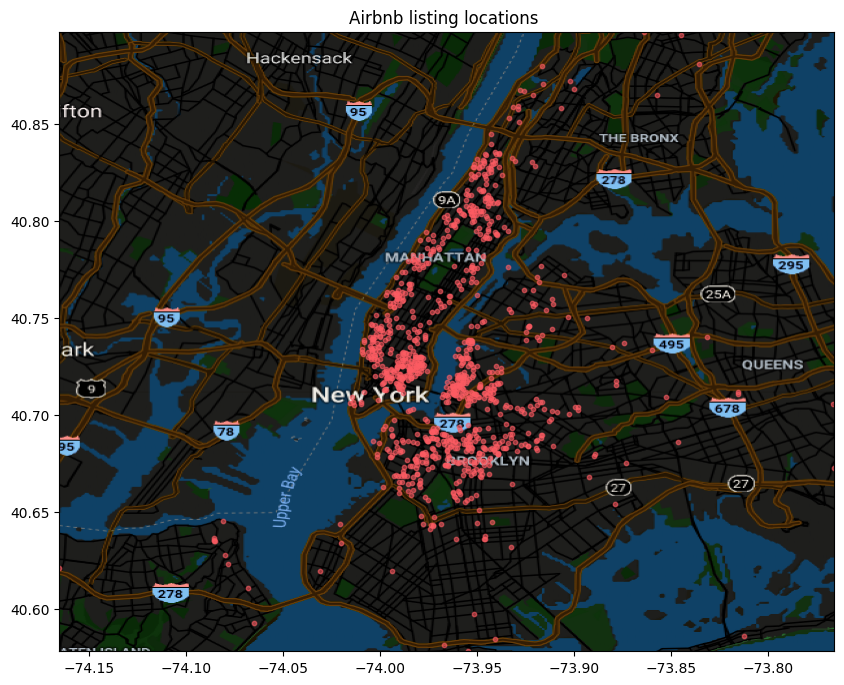

In [54]:
longlat_min_max = (airbnb_df.longitude.min(), airbnb_df.longitude.max(), airbnb_df.latitude.min(), airbnb_df.latitude.max())

nyc = plt.imread('./data/nyc-map.png')

fig, ax = plt.subplots(figsize=(10,9))

ax.scatter(airbnb_df.longitude, airbnb_df.latitude, zorder=1, alpha=0.6, c='#fd5c63', s=10)
ax.set_title('Airbnb listing locations ')
ax.imshow(nyc, extent=longlat_min_max);

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Fixing `availability_365` values

This columns should casted to numeric dtype, but it has many invalid string values, like `43+N524`, that should be coerced while casting.

Also we can see many values out of domain, let's fix them:
- Negative numbers, that should be converted to positive.
- Numbers above 365, that should be dropped.

In [55]:
airbnb_df['availability_365'].unique()

array(['365', '355', '194', '0', '129', '220', '188', '6', '39', '314',
       '46', '321', '12', '21', '347', '364', '304', '233', '85', '75',
       '311', '67', '255', '284', '359', '269', '340', '22', '96', '345',
       '273', '3454', '95', '215', '265', '192', '251', '302', '140',
       '234', '257', '30', '301', '294', '320', '154', '5234', '180',
       '231', '297', '292', '191', '72', '362', '336', '116', '88', '224',
       '322', '324', '132', '295', '238', '209', '328', '7', '272', '26',
       '288', '317', '207', '185', '158', '9', '198', '219', '342', '312',
       '243', '152', '137', '222', '346', '208', '279', '250', '164',
       '298', '260', '107', '199', '299', '20', '318', '216', '245',
       '189', '307', '310', '213', '278', '16', '178', '275', '163', '34',
       '280', '1', '170', '214', '248', '262', '339', '10', '290', '230',
       '53', '126', '3', '37', '353', '177', '1111', '246', '225', '18',
       '343', '326', '162', '240', '363', '247', '323', '

In [56]:
# your code goes here
airbnb_df['availability_365'] = pd.to_numeric(airbnb_df['availability_365'], errors='coerce')


In [57]:
airbnb_df.loc[airbnb_df['availability_365'] < 0]

,listing_name,host_id,host_name,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood,borough,latitude,longitude
listing_id,,,,,,,,,,,,,,,
61492,Exclusive Room with Private Bath in LES,297769.0,Tunji,Private room,120.0,4,171,2019-06-23,1.80,2,-153.0,Chinatown,Manhattan,40.71445,-73.99080
66008,CHARMING CARROLL GARDENS APT.,322884.0,Melissa,Entire home/apt,190.0,3,51,2019-01-07,0.57,1,-104.0,Carroll Gardens,Brooklyn,40.67846,-73.99443
74240,French Garden cottage off Bedford,389924.0,Patty,Entire home/apt,169.0,1,68,2019-07-06,0.67,2,-135.0,Williamsburg,Brooklyn,40.71903,-73.95970
176135,Cosy Sunny 1brm in Prospect Heights,842125.0,Jennifer,Entire home/apt,97.0,3,31,2018-10-23,0.32,1,-344.0,Crown Heights,Brooklyn,40.67505,-73.95969
228317,"Your Haven Awaits At ""Emma's Place""",1191142.0,Lady Jay,Entire home/apt,135.0,4,82,2019-05-18,0.87,1,-64.0,Bedford-Stuyvesant,Brooklyn,40.68516,-73.92521
255957,NOLITA! LOCATION! LOCATION! VIEWS! FREE GYM!,506779.0,Claudia,Entire home/apt,495.0,7,25,2019-06-30,0.27,2,-234.0,Nolita,Manhattan,40.72004,-73.99424
263005,2 bedroom apt in charming brick townhouse,1380060.0,Marisa And Colin,Entire home/apt,145.0,3,110,2019-02-06,1.20,1,-15.0,Fort Greene,Brooklyn,40.69778,-73.97676


In [58]:
airbnb_df['availability_365'] = airbnb_df['availability_365'].abs()

In [59]:
airbnb_df = airbnb_df[airbnb_df['availability_365'] <= 365]

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Most reviews

Create a Series `most_reviews` containing the top 10 `host_name`s with the most total (sum) reviews per month accross all properties owned by that host.

In [60]:
# your code goes here
most_reviews = airbnb_df['reviews_per_month'].groupby(airbnb_df['host_name']).sum().sort_values(ascending=False).head(10)

#### Visualizing most_reviews

Text(0, 0.5, '')

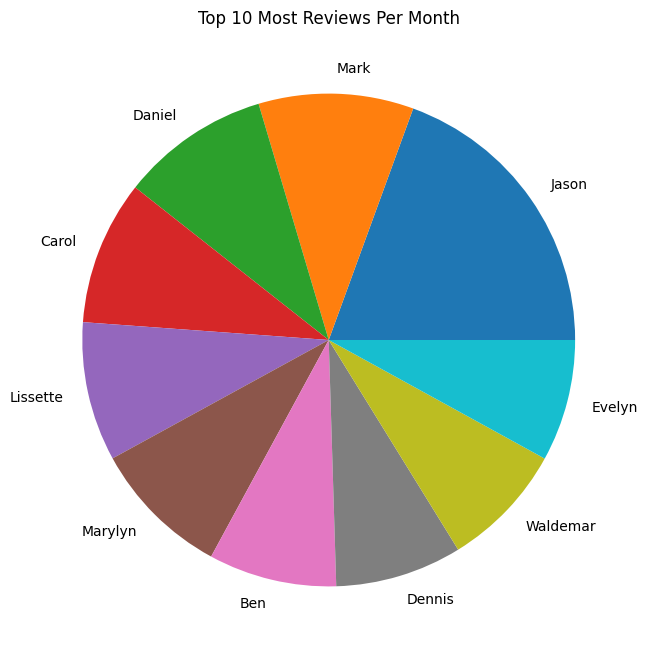

In [61]:
most_reviews.plot(kind='pie',figsize=(8, 8))

plt.title("Top 10 Most Reviews Per Month")
plt.ylabel("")

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Most expensive listings

Create a variable `expensive_listings_df` containing the top 100 most expensive per night listings. The most expensive should be at the top.

In [71]:
# your code goes here
expensive_listings_df = airbnb_df.sort_values(by='price', ascending= False).head(100)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Which neighbourhood has biggest amount of expensive listings?

Using the `expensive_listings_df` listings count the occurrences of each `neighbourhood` they belong.

In [74]:
# your code goes here
expensive_listings_df['neighbourhood'].value_counts()


neighbourhood
Chelsea               9
Williamsburg          9
Harlem                7
Greenpoint            7
West Village          7
East Village          7
Upper West Side       5
Nolita                5
Carroll Gardens       4
Clinton Hill          4
Hell's Kitchen        3
Upper East Side       3
Bedford-Stuyvesant    3
Midtown               3
Park Slope            2
Boerum Hill           2
SoHo                  2
Lower East Side       2
South Slope           2
Brooklyn Heights      1
Little Italy          1
Flatbush              1
Greenwich Village     1
Gramercy              1
Prospect Heights      1
Ridgewood             1
DUMBO                 1
Flatiron District     1
Chinatown             1
Washington Heights    1
Middle Village        1
Financial District    1
Gowanus               1
Name: count, dtype: int64

#### Visualizing neighbourhoods

<Axes: xlabel='neighbourhood'>

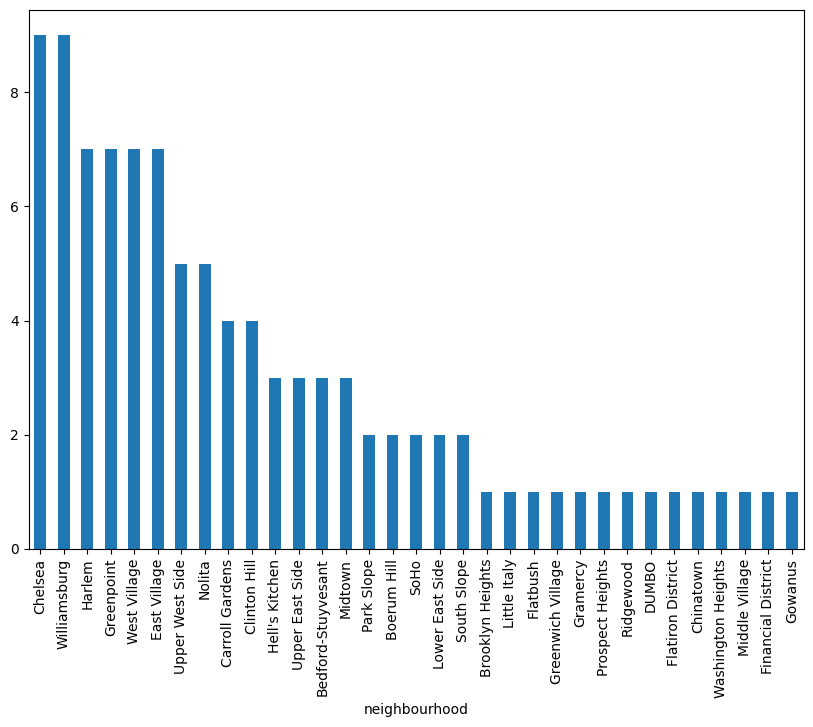

In [75]:
expensive_listings_df['neighbourhood'].value_counts().plot(kind='bar', figsize=(10,7))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Which neighbourhood has the most listings?

Using all the listings from `airbnb_df` count how many listings each neighbourhood has. Keep just the top 10 neighbourhoods with the most listings.

In [76]:
# your code goes here
airbnb_df['neighbourhood'].value_counts().head(10)


neighbourhood
Williamsburg          110
Harlem                 74
Bedford-Stuyvesant     72
East Village           65
Upper West Side        44
Greenpoint             42
West Village           33
Crown Heights          32
Hell's Kitchen         30
Park Slope             27
Name: count, dtype: int64

#### Visualizing neighbourhoods

<Axes: xlabel='neighbourhood'>

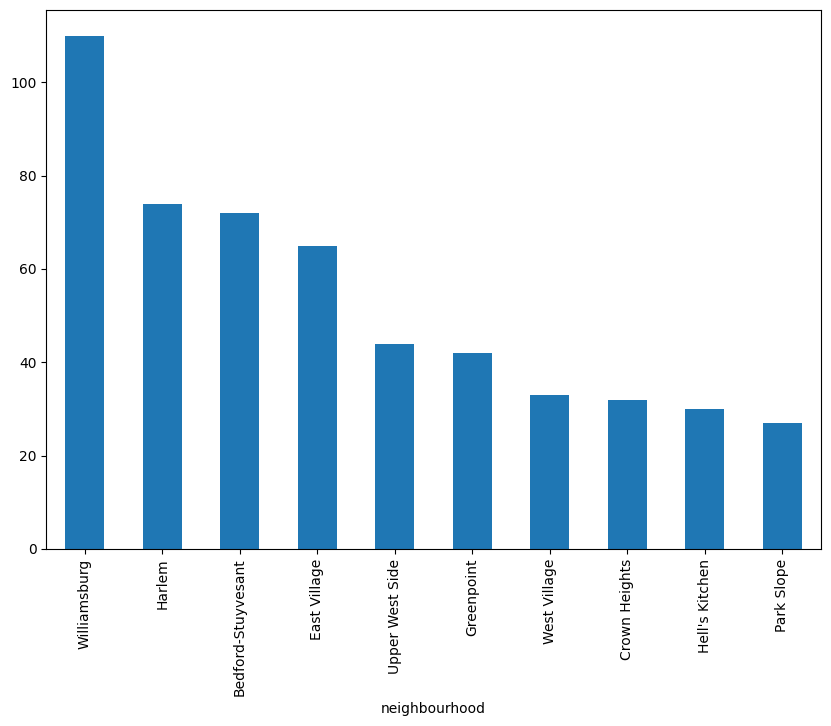

In [77]:
airbnb_df['neighbourhood'].value_counts().head(10).plot(kind='bar', figsize=(10,7))

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)